In [ ]:
import csv
import pandas as pd
import numpy as np
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from io import StringIO

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ECE1786 Project/Dataset/

import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1fJllm6_aqmmawo8B6hq9rhewEDIBmSpR/ECE1786 Project/Dataset


In [ ]:
df = pd.read_csv('dataset_all_genres.csv',error_bad_lines=False)
genres = ['Blues', 'Country', 'EDM', 'Hip Hop', 'Indie', 'Pop', 'R&B', 'Rock']
df = df[df['primary_genre'].isin(genres)]


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_sampled = df.groupby('primary_genre').sample(n=1750, random_state=200)

In [ ]:
#preprocess data
stop_words = set(stopwords.words('english'))
#max length of any lyric
max_lengths = []

def preprocess_lyrics(lyrics, remove_stop_words = True):

  tokenizer = RegexpTokenizer(r'\w+')
  #lyrics = profanity.censor(lyrics)
  word_tokens = tokenizer.tokenize(lyrics)
  lyrics = [w for w in word_tokens if not w in stop_words]

  if remove_stop_words:
    filtered_lyrics = []
    for w in word_tokens:
      if w not in stop_words:
        filtered_lyrics.append(w.lower())
    max_lengths.append(len(filtered_lyrics))
    return filtered_lyrics
  else:
    return word_tokens

In [ ]:
print(df.loc[df['primary_genre'] == "Blues"]['lyrics'])

7253     Riders on the storm,\nRiders on the storm,\n\n...
7254     Yeah!\nKeep your eyes on the road, your hands ...
7255     This is the end\nBeautiful friend\nThis is the...
7256     You know that it would be untrue\nYou know tha...
7257     People are strange, when you're a stranger\nFa...
                               ...                        
10642    Every Monday mornin', people just a worrifull ...
10643    I've cried and I worries, all night I lays and...
10644    I hear these women raving 'bout their\nmonkey ...
10645    The time has come for us to part\nI ain't goin...
10646    Old pal old pal, you stole my man away (2x)\nB...
Name: lyrics, Length: 2038, dtype: object


In [ ]:
unique_words_per_genre = {}
for genre in genres:
  
  #get rows of dataframe that just have that genre
  lyrics = df.loc[df['primary_genre'] == genre]['lyrics']
  processed_lyrics = []
  for lyric in lyrics:
    processed_lyrics.extend(preprocess_lyrics(lyric))
  c = Counter(processed_lyrics)
  unique_words_per_genre[genre] = c;


In [ ]:
print(unique_words_per_genre["Blues"])

Counter({'i': 19544, 'baby': 4668, 'you': 3194, 'love': 3184, 'know': 2854, 'got': 2657, 'and': 2273, 'oh': 2025, 'well': 1871, 'gonna': 1708, 'yeah': 1649, 'like': 1645, 'get': 1399, 'time': 1359, 'go': 1304, 'man': 1299, 'but': 1277, 'one': 1255, 'come': 1205, 'the': 1182, 'back': 1173, 'way': 1096, 'tell': 1083, 'want': 1082, 'woman': 1061, 'let': 1015, 'see': 994, 'little': 969, 'she': 956, 'night': 919, 'good': 907, 'it': 891, 'right': 879, 'day': 870, 'yes': 866, 'when': 863, 'blues': 860, 'long': 859, 'say': 849, 'home': 847, 'make': 846, 'take': 835, 'never': 787, 'said': 787, 'that': 730, 'cause': 663, 'if': 659, 'away': 659, 'feel': 657, 'don': 646, 'my': 633, 'around': 621, 'gone': 599, 'heart': 599, 'mind': 592, 'wanna': 591, 'need': 588, 'please': 582, 'lord': 579, 'now': 571, 'life': 563, 'girl': 559, 'world': 532, 'look': 532, 'all': 527, 'hey': 519, 'ever': 508, 'think': 498, 'we': 495, 'so': 489, 'keep': 485, 'could': 481, 'give': 479, 'ya': 478, 'old': 471, 'every': 4

In [ ]:
max_lengths.sort(reverse=True)
print(len(max_lengths))
print(max_lengths)

76828
[4107, 2014, 1987, 1779, 1610, 1597, 1526, 1456, 1283, 1261, 1170, 1158, 1136, 1135, 1111, 1109, 1081, 1035, 1028, 1010, 1009, 996, 987, 980, 980, 960, 956, 950, 946, 935, 933, 931, 925, 925, 925, 913, 895, 889, 889, 887, 886, 882, 882, 878, 876, 875, 874, 873, 863, 861, 860, 860, 856, 854, 850, 849, 844, 836, 834, 834, 829, 828, 824, 820, 816, 815, 814, 813, 807, 803, 803, 802, 798, 798, 797, 796, 796, 795, 795, 794, 794, 793, 789, 789, 789, 786, 786, 786, 785, 783, 782, 779, 779, 777, 775, 774, 769, 766, 763, 761, 761, 760, 760, 755, 755, 749, 748, 748, 747, 744, 743, 741, 741, 740, 739, 738, 738, 734, 733, 733, 733, 731, 730, 729, 729, 729, 726, 726, 726, 722, 722, 721, 721, 720, 719, 715, 715, 713, 712, 712, 710, 710, 710, 709, 709, 707, 705, 704, 704, 704, 703, 703, 702, 702, 701, 701, 700, 700, 700, 700, 699, 696, 696, 696, 695, 695, 694, 693, 693, 692, 692, 691, 691, 687, 687, 687, 687, 687, 686, 686, 685, 684, 683, 683, 683, 683, 682, 682, 681, 680, 680, 679, 679, 679, 67

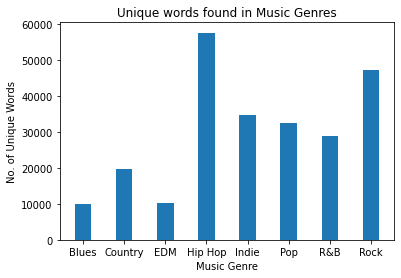

In [ ]:
#get number of unique words for each genre
unique_words_count = []
for genre in genres:
  unique_words_count.append(len(unique_words_per_genre[genre]))

plt.bar(genres, unique_words_count, width = 0.4)
plt.xlabel("Music Genre")
plt.ylabel("No. of Unique Words")
plt.title("Unique words found in Music Genres")
plt.show()

Blues
Country
EDM
Hip Hop
Indie
Pop
R&B
Rock


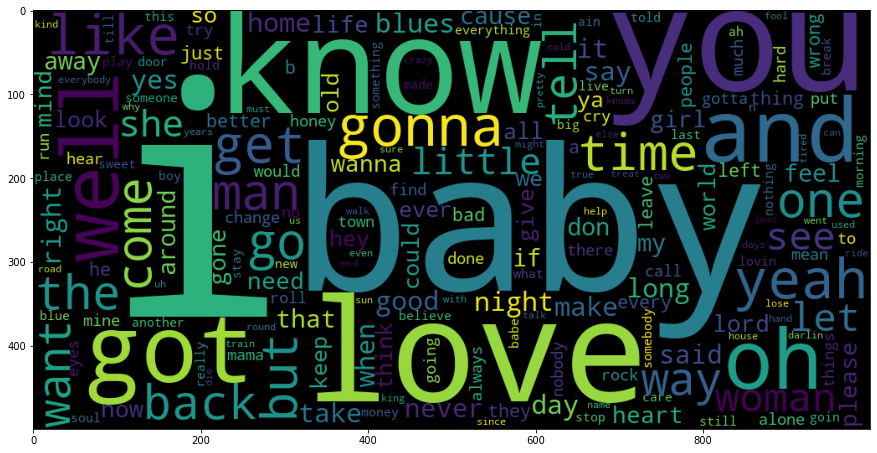

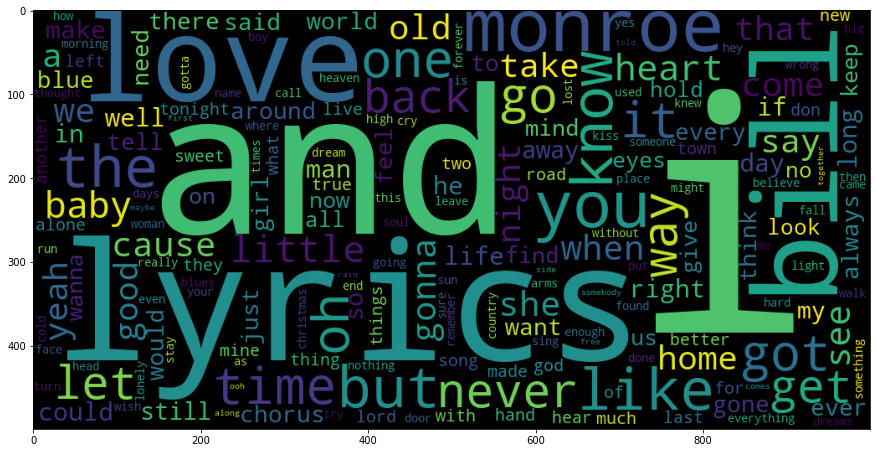

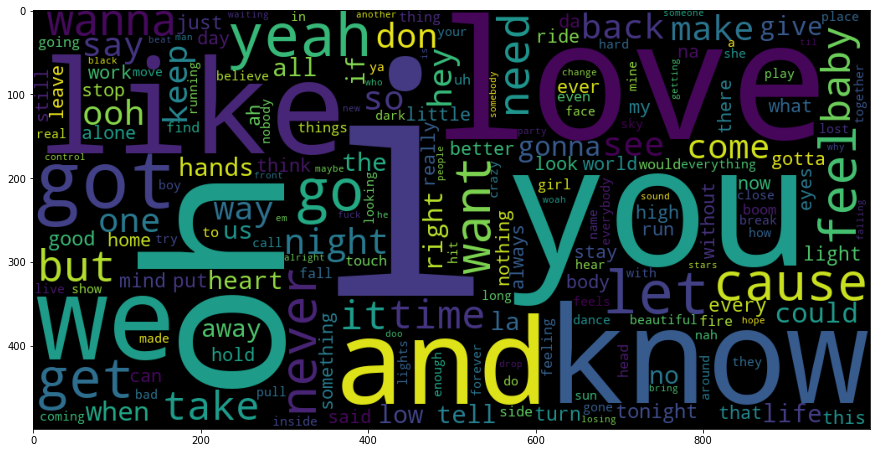

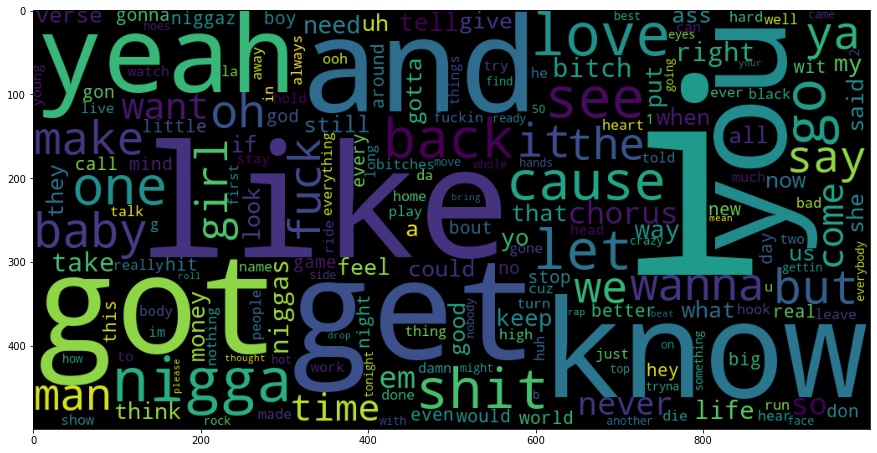

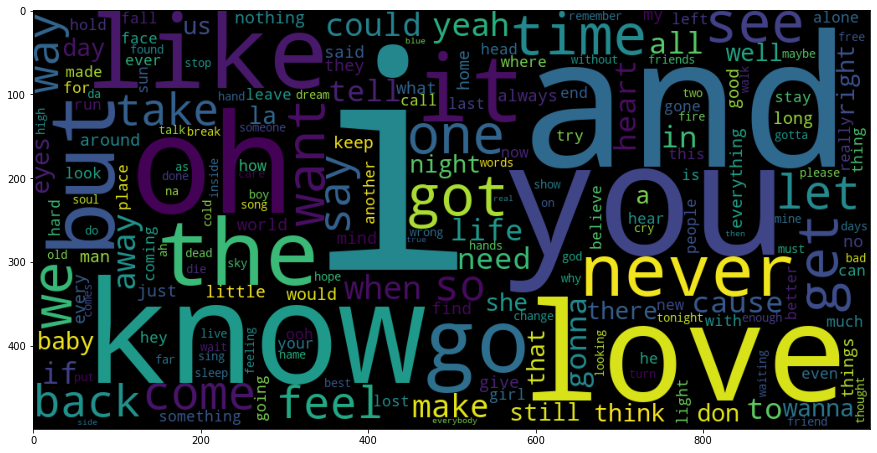

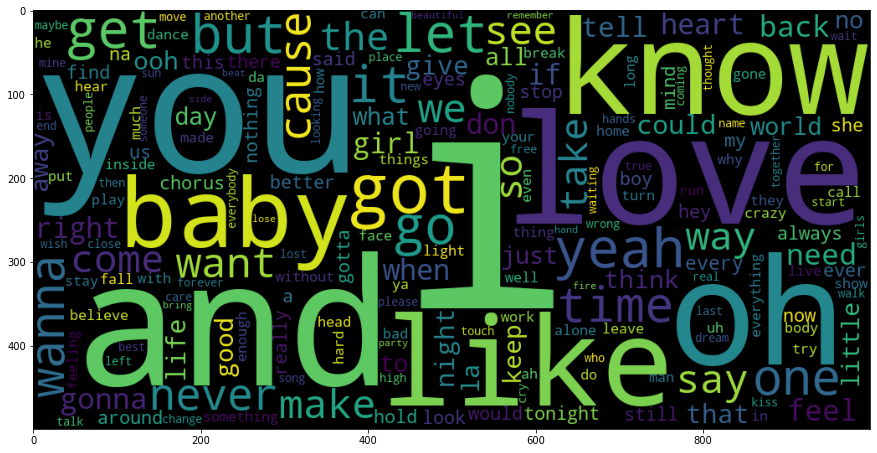

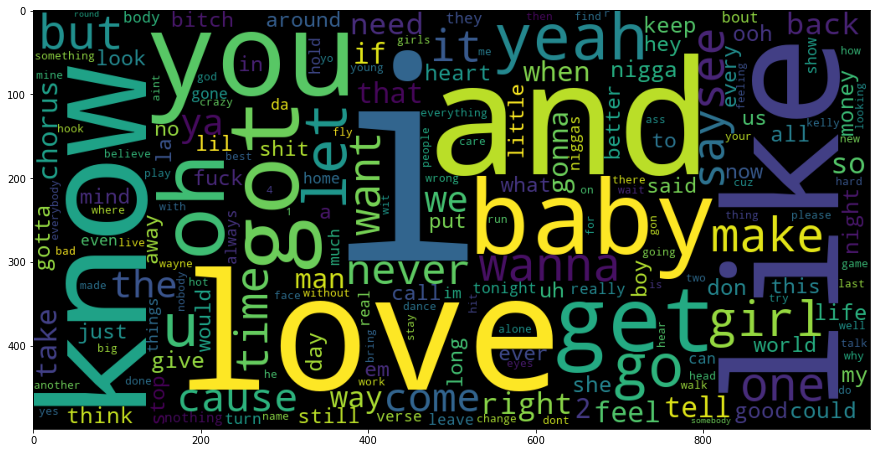

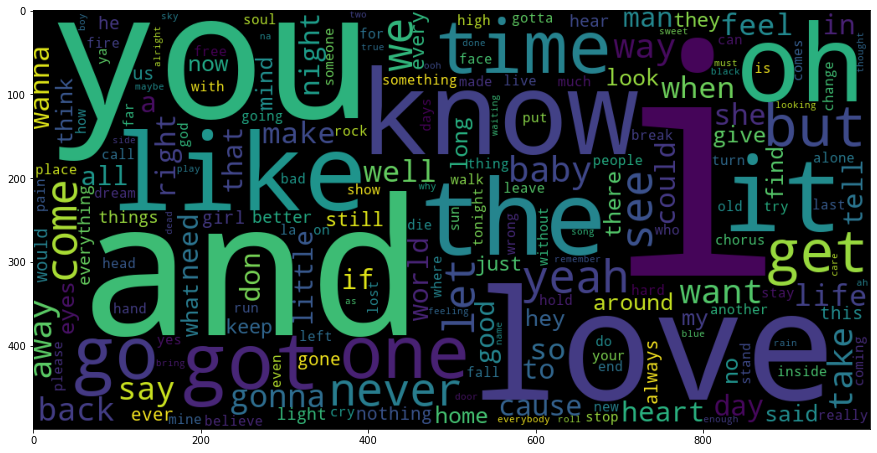

In [ ]:
#generate the word clouds
for genre in genres:
  count_dict = unique_words_per_genre[genre]
  wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(count_dict)
  print(genre)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)

In [ ]:
words_per_genre = {}
for genre in genres:
  words_per_genre[genre] = []
  for k in unique_words_per_genre[genre]:
     words_per_genre[genre].append(k)


In [ ]:
#find overlapping words between indie and pop
counter = 0
for w in words_per_genre["Indie"]:
  if w in words_per_genre["Pop"]:
    counter = counter + 1
print(float(counter/len(words_per_genre["Indie"])))

0.5371767551690376


In [ ]:
#find overlapping words between indie and rock
counter = 0
for w in words_per_genre["Indie"]:
  if w in words_per_genre["Rock"]:
    counter = counter + 1
print(float(counter/len(words_per_genre["Indie"])))

0.6777054656453377


In [ ]:
#find overlapping words between indie and hip hop 
counter = 0
for w in words_per_genre["Indie"]:
  if w in words_per_genre["EDM"]:
    counter = counter + 1
print(float(counter/len(words_per_genre["Indie"])))

0.20506248920117492


In [ ]:
#find overlapping words between pop and r&b
counter = 0
for w in words_per_genre["Pop"]:
  if w in words_per_genre["R&B"]:
    counter = counter + 1
print(float(counter/len(words_per_genre["Pop"])))

0.5170590766582652
